# <font color=maroon> Classroom assignments 2 例程 </font>  

构建信号  
$$  
x_{a}(t)=sin(2\pi*150t)+sin(2\pi*3250t)+sin(2\pi*400t)  
$$  
并用  
$$  
f_{s1}=680Hz,f_{s2}=900Hz,f_{s3}=1000Hz  
$$  
的采样频率对$x_{a}(t)$进行采样，分别画出时域信号和频域信号波形。

C:\Users\112\AppData\Local\Temp\ipykernel_18120\994690813.py:46: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.savefig('./freq_samp1.png',dpi=500)
C:\Users\112\AppData\Local\Temp\ipykernel_18120\994690813.py:46: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.savefig('./freq_samp1.png',dpi=500)
C:\Users\112\AppData\Local\Temp\ipykernel_18120\994690813.py:46: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.
  fig.savefig('./freq_samp1.png',dpi=500)
C:\Users\112\AppData\Local\Temp\ipykernel_18120\994690813.py:46: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.
  fig.savefig('./freq_samp1.png',dpi=500)
C:\Users\112\AppData\Local\Temp\ipykernel_18120\994690813.py:46: UserWarning: Glyph 37319 (\N{CJK UNIFIED IDEOGRAPH-91C7}) missing from current font.
  fig.savefig('./freq_samp1.png',dpi=500)
C:\Users\112\AppData\Local\Temp\ipykerne

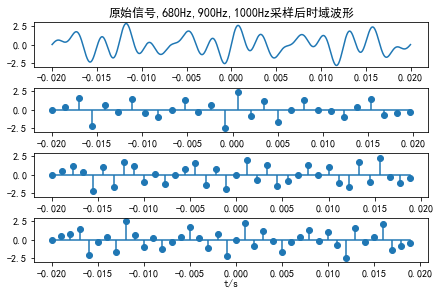

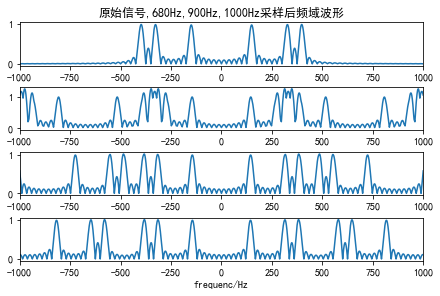

In [1]:
#导入使用的库
import numpy as np;from math import *
from scipy import fft
import matplotlib.pyplot as plt

def signfunc(f): #定义信号函数
    f1 = 150;f2 = 325;f3 = 400
    t = np.arange(-0.02,0.02,1/f)
    return t,np.sin(2*pi*f1*t)+np.sin(2*pi*f2*t)+np.sin(2*pi*f3*t)

#原始信号
fa = 100000;ta,xa = signfunc(fa);N = len(xa)
N0 = N*500
He_a = np.abs(fft.fft(xa,N0));He_a = He_a/np.max(He_a) #原始信号的频谱
freq_a = fft.fftfreq(N0,1/fa)
He_a = fft.fftshift(He_a);freq_a = fft.fftshift(freq_a)

def samp_spec(f_samp,f_anal,He,m): #定义采样后的频谱合成函数
    N = len(He);M = int((f_samp*N/f_anal)*(m-1)+N) #合成频谱的长度
    He_retn = np.append(He,np.zeros(M-N))
    for i in range(m-1):
        N_fron = int((f_samp*N/f_anal)*(i+1))
        He_fron = np.zeros(N_fron)
        He_midd = np.append(He_fron,He)
        He_back = np.zeros(M-N_fron-N)
        He_shift = np.append(He_midd,He_back)
        He_retn = He_retn+He_shift
    freq = fft.fftfreq(M,1/f_anal)
    freq = fft.fftshift(freq)
    return freq,He_retn

#对原始信号进行采样
fs1 = 680;fs2 = 900;fs3 = 1000;m = 5 #频谱搬移次数
t1,x_hat1 = signfunc(fs1);t2,x_hat2 = signfunc(fs2);t3,x_hat3 = signfunc(fs3)
freq1,He1 = samp_spec(fs1,fa,He_a,m);freq2,He2 = samp_spec(fs2,fa,He_a,m)
freq3,He3 = samp_spec(fs3,fa,He_a,m)

#绘制原信号及各采样信号的时域波形
fig,ax = plt.subplots(4,1,constrained_layout=True)
ax[0].plot(ta,xa);ax[1].stem(t1,x_hat1,basefmt="")
ax[2].stem(t2,x_hat2,basefmt="");ax[3].stem(t3,x_hat3,basefmt="")
ax[0].set_ylim([-3,3]);ax[1].set_ylim([-3,3])
ax[2].set_ylim([-3,3]);ax[3].set_ylim([-3,3])
ax[0].set_title('原始信号,680Hz,900Hz,1000Hz采样后时域波形')
ax[3].set_xlabel('t/s')
fig.savefig('./freq_samp1.png',dpi=500)

#绘制原信号及各采样信号的幅度响应
fig,ax = plt.subplots(4,1,constrained_layout=True)
ax[0].plot(freq_a,He_a);ax[1].plot(freq1,He1)
ax[2].plot(freq2,He2);ax[3].plot(freq3,He3)
ax[0].set_xlim([-1000,1000]);ax[1].set_xlim([-1000,1000]);
ax[2].set_xlim([-1000,1000]);ax[3].set_xlim([-1000,1000]);
ax[0].set_title('原始信号,680Hz,900Hz,1000Hz采样后频域波形')
ax[3].set_xlabel('frequenc/Hz')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
fig.savefig('./freq_samp2.png',dpi=500)

# <font color=maroon> Classroom assignments 2</font>  
参考上面例程，对$1Hz$和$2Hz$正弦波叠加信号进行$8Hz$采样，采用$Matlab$和$Python$编程实现信号采样和内插恢复，并比较原信号和恢复后信号。

In [3]:
#作业代码区
i = 256*256
print('The value of i is', i)

The value of i is 65536
